# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how Convolution Neural Networks (CNNs) work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN (or ConvNet) on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab are a bunch of pictures of cats and dogs, and our task is to correctly classify a picture as one or the other. The [original dataset](https://www.kaggle.com/c/dogs-vs-cats) is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **cats_dogs_downsampled**, of this repository. 

In [1]:
# Load the images

train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 

In [2]:
# Set-up date time to track how long run time takes
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [4]:
# Preprocess the images into tensors
# Rescale the data by 1/.255 and use binary_crossentropy loss
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')


Found 2140 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


## Designing the Model

Now it's time to design your CNN using Keras. Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [5]:
# Design the model
# Note: You may get a comment from tf regarding your kernel. This is not a warning per se, but rather informational.
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. See the code chunk below to see how long it took to run your model. 

If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [7]:
# Set the model to train 
# Note: You may get a comment from tf regarding your GPU or sometning similar.
# This is not a warning per se, but rather informational.
# ⏰ This cell may take several minutes to run 
history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

Epoch 1/30


/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 538ms/step - acc: 0.5201 - loss: 0.6902 - val_acc: 0.5000 - val_loss: 0.6823
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.5477 - loss: 0.6801 - val_acc: 0.5500 - val_loss: 0.6592
Epoch 3/30


2024-07-09 06:52:59.461687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/laaria/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-07-09 06:52:59.582150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 487ms/step - acc: 0.5738 - loss: 0.6700 - val_acc: 0.6475 - val_loss: 0.6466
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.5960 - loss: 0.6541 - val_acc: 0.6000 - val_loss: 0.6042
Epoch 5/30


2024-07-09 06:53:51.941837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:53:52.063357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 511ms/step - acc: 0.6195 - loss: 0.6510 - val_acc: 0.6875 - val_loss: 0.6180
Epoch 6/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 42s 455ms/step - acc: 0.6488 - loss: 0.6061

2024-07-09 06:54:46.938880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:54:47.108378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - acc: 0.6233 - loss: 0.6324 - val_acc: 0.7000 - val_loss: 0.6032
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 50s 496ms/step - acc: 0.6668 - loss: 0.6040 - val_acc: 0.6300 - val_loss: 0.6166
Epoch 8/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 52s 570ms/step - acc: 0.6843 - loss: 0.5792

2024-07-09 06:55:45.509697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:55:45.643126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - acc: 0.6856 - loss: 0.5744 - val_acc: 0.8500 - val_loss: 0.4276
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 525ms/step - acc: 0.6802 - loss: 0.5760 - val_acc: 0.7300 - val_loss: 0.5801
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.7450 - loss: 0.5266 - val_acc: 0.6500 - val_loss: 0.5834
Epoch 11/30


2024-07-09 06:56:45.620754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:56:45.730514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 533ms/step - acc: 0.6792 - loss: 0.5728 - val_acc: 0.7250 - val_loss: 0.5651
Epoch 12/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 49s 531ms/step - acc: 0.7319 - loss: 0.6157

2024-07-09 06:57:43.068641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:57:43.183858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - acc: 0.7288 - loss: 0.5903 - val_acc: 0.7000 - val_loss: 0.5008
Epoch 13/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 510ms/step - acc: 0.7334 - loss: 0.5327 - val_acc: 0.6950 - val_loss: 0.5406
Epoch 14/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 39s 420ms/step - acc: 0.7051 - loss: 0.5606

2024-07-09 06:58:41.667638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 06:58:41.765338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - acc: 0.7136 - loss: 0.5915 - val_acc: 0.5500 - val_loss: 0.8390
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 502ms/step - acc: 0.7318 - loss: 0.5252 - val_acc: 0.7225 - val_loss: 0.5345
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.7627 - loss: 0.4876 - val_acc: 0.6500 - val_loss: 0.5433
Epoch 17/30


2024-07-09 07:00:03.424634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:00:03.521559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 541ms/step - acc: 0.7467 - loss: 0.5129 - val_acc: 0.7500 - val_loss: 0.5199
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.7587 - loss: 0.4939 - val_acc: 0.8000 - val_loss: 0.4983
Epoch 19/30


2024-07-09 07:01:01.541935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:01:01.721446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 512ms/step - acc: 0.7642 - loss: 0.4715 - val_acc: 0.7450 - val_loss: 0.4984
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.7297 - loss: 0.5071 - val_acc: 0.6000 - val_loss: 0.6664
Epoch 21/30


2024-07-09 07:01:56.682415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:01:56.802559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 456ms/step - acc: 0.7886 - loss: 0.4684 - val_acc: 0.6625 - val_loss: 0.6407
Epoch 22/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 36s 389ms/step - acc: 0.6852 - loss: 0.5988

2024-07-09 07:02:45.655492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:02:45.754806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.7056 - loss: 0.5402 - val_acc: 0.7000 - val_loss: 0.4804
Epoch 23/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 452ms/step - acc: 0.8008 - loss: 0.4305 - val_acc: 0.6675 - val_loss: 0.6016
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.8408 - loss: 0.3911 - val_acc: 0.7000 - val_loss: 0.4862
Epoch 25/30


2024-07-09 07:03:34.364428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:03:34.466823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - acc: 0.8065 - loss: 0.4212 - val_acc: 0.7450 - val_loss: 0.5126
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.7918 - loss: 0.3777 - val_acc: 0.7500 - val_loss: 0.4564
Epoch 27/30


2024-07-09 07:04:19.111169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:04:19.213171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 412ms/step - acc: 0.8239 - loss: 0.3851 - val_acc: 0.7475 - val_loss: 0.4957
Epoch 28/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8436 - loss: 0.3721 - val_acc: 0.6500 - val_loss: 0.6491
Epoch 29/30


2024-07-09 07:05:03.503661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:05:03.591247: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 444ms/step - acc: 0.8444 - loss: 0.3753 - val_acc: 0.7650 - val_loss: 0.4790
Epoch 30/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.8113 - loss: 0.3862 - val_acc: 0.6000 - val_loss: 0.6458


2024-07-09 07:05:51.037499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:05:51.125176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


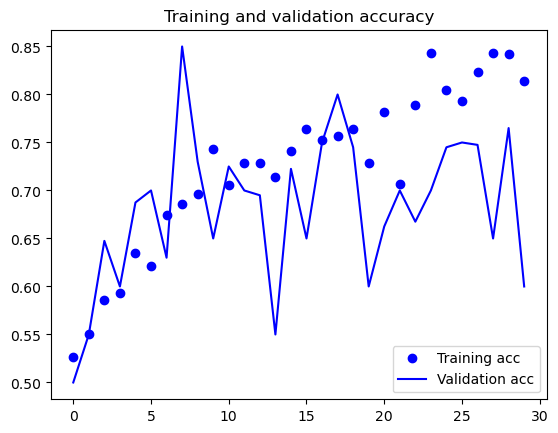

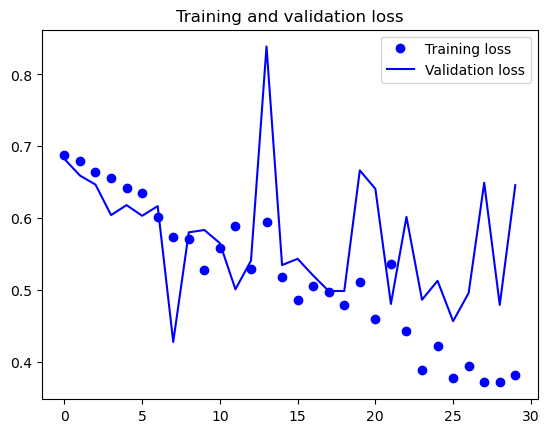

In [8]:
# Plot history

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
# Check runtime

end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))

Training took a total of 0:22:47.475782


## Save the Model

In [ ]:
# Save the model for future reference 

model.save('cats_dogs_downsampled_data.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. If you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process may take awhile depending on your set-up. As such, make allowances for this as necessary.** 

In [10]:
# Set-up date time to track how long run time takes
start = datetime.datetime.now()

In [11]:
# Add data augmentation to the model setup and set the model to train; 
# See the warnings above if you intend to run these blocks of code 
# ⏰ These cells where may take quite some time to run

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

Found 2140 images belonging to 2 classes.
Epoch 1/30


/home/laaria/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 454ms/step - acc: 0.6731 - loss: 0.6144 - val_acc: 0.7575 - val_loss: 0.4844
Epoch 2/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 41s 445ms/step - acc: 0.7246 - loss: 0.6111

2024-07-09 07:06:42.066747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/laaria/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-07-09 07:06:42.206023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - acc: 0.7017 - loss: 0.6143 - val_acc: 0.8500 - val_loss: 0.4051
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 448ms/step - acc: 0.7032 - loss: 0.5631 - val_acc: 0.7600 - val_loss: 0.4798
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.6605 - loss: 0.6041 - val_acc: 0.8000 - val_loss: 0.4796
Epoch 5/30


2024-07-09 07:08:02.916885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:08:03.021971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 422ms/step - acc: 0.7106 - loss: 0.5615 - val_acc: 0.7925 - val_loss: 0.4526
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.7242 - loss: 0.5336 - val_acc: 0.7000 - val_loss: 0.5921
Epoch 7/30


2024-07-09 07:08:48.908208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:08:49.012383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 439ms/step - acc: 0.7252 - loss: 0.5402 - val_acc: 0.7825 - val_loss: 0.4580
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - acc: 0.8136 - loss: 0.4880 - val_acc: 0.7000 - val_loss: 0.5604
Epoch 9/30


2024-07-09 07:09:36.680799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:09:36.765568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 470ms/step - acc: 0.7075 - loss: 0.5449 - val_acc: 0.7825 - val_loss: 0.4598
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.7168 - loss: 0.5241 - val_acc: 0.8000 - val_loss: 0.4063
Epoch 11/30


2024-07-09 07:10:28.265520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:10:28.390063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 556ms/step - acc: 0.7234 - loss: 0.5402 - val_acc: 0.7875 - val_loss: 0.4480
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - acc: 0.7559 - loss: 0.4916 - val_acc: 0.7000 - val_loss: 0.5117
Epoch 13/30


2024-07-09 07:11:59.368931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:11:59.462817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 423ms/step - acc: 0.7265 - loss: 0.5265 - val_acc: 0.7425 - val_loss: 0.5072
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.7791 - loss: 0.4955 - val_acc: 0.8000 - val_loss: 0.4376
Epoch 15/30


2024-07-09 07:12:45.531752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:12:45.623304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 80s 427ms/step - acc: 0.7270 - loss: 0.5248 - val_acc: 0.7575 - val_loss: 0.4931
Epoch 16/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 1:19 850ms/step - acc: 0.8073 - loss: 0.4726

2024-07-09 07:14:11.187539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - acc: 0.8005 - loss: 0.4759 - val_acc: 0.8000 - val_loss: 0.5074
Epoch 17/30


2024-07-09 07:14:11.435108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 508ms/step - acc: 0.7240 - loss: 0.5313 - val_acc: 0.7825 - val_loss: 0.4381
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.6563 - loss: 0.5274 - val_acc: 0.7500 - val_loss: 0.4894
Epoch 19/30


2024-07-09 07:15:06.881210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:15:06.959251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 450ms/step - acc: 0.7282 - loss: 0.5159 - val_acc: 0.8025 - val_loss: 0.4296
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.7565 - loss: 0.5131 - val_acc: 0.6000 - val_loss: 0.6242
Epoch 21/30


2024-07-09 07:16:21.903156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:16:22.014709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 89s 538ms/step - acc: 0.7497 - loss: 0.5062 - val_acc: 0.7800 - val_loss: 0.4574
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.7755 - loss: 0.5015 - val_acc: 0.9000 - val_loss: 0.2852
Epoch 23/30


2024-07-09 07:17:53.624377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:17:53.722136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 566ms/step - acc: 0.7435 - loss: 0.5129 - val_acc: 0.7725 - val_loss: 0.4724
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.7241 - loss: 0.5482 - val_acc: 0.7500 - val_loss: 0.3870
Epoch 25/30


2024-07-09 07:18:54.629909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:18:54.735386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 432ms/step - acc: 0.7694 - loss: 0.4727 - val_acc: 0.8250 - val_loss: 0.4174
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.7580 - loss: 0.4734 - val_acc: 0.8000 - val_loss: 0.4301
Epoch 27/30


2024-07-09 07:20:02.269271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:20:02.362588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 477ms/step - acc: 0.7283 - loss: 0.5223 - val_acc: 0.8050 - val_loss: 0.4130
Epoch 28/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 34s 374ms/step - acc: 0.8155 - loss: 0.4528

2024-07-09 07:21:28.964734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - acc: 0.8144 - loss: 0.4436 - val_acc: 0.8000 - val_loss: 0.4686
Epoch 29/30


2024-07-09 07:21:29.195638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 502ms/step - acc: 0.7527 - loss: 0.5156 - val_acc: 0.7975 - val_loss: 0.4286
Epoch 30/30
  7/100 ━━━━━━━━━━━━━━━━━━━━ 46s 504ms/step - acc: 0.7545 - loss: 0.4805

2024-07-09 07:22:54.783461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-09 07:22:54.973389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - acc: 0.7570 - loss: 0.4775 - val_acc: 0.8000 - val_loss: 0.3759


In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
# Check runtime
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed)) 


Training with data augmentation took a total of 0:17:02.995463


Save the model for future reference.  

In [13]:
# Save the model 
model.save('cats_dogs_downsampled_with_augmentation_data.h5')

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [14]:
# Perform a final evaluation using the test set

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)

Found 425 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - acc: 0.7966 - loss: 0.4725
test acc: 0.7699999809265137


## Summary

Well done. In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.